<a href="https://colab.research.google.com/github/toccht/CSCI-4962/blob/main/CSCI4962_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSCI-4962 Homework 1
Author: Trevor Tocchet

In [89]:
# imports
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# Data
In the United States there is approximately 70 million dollars of counterfeit currancy in circulation back in 2006 accoring to the U.S Treasury (https://www.treasury.gov/press-center/press-releases/Pages/hp154.aspx). This is also a serious issue around the world, so being able to detect real vs counterfeit banknotes is crucial in fighting fraud. 

On the UCI Machine Learning Repository, there is a dataset containing extracted image data "that were taken for the evaluation of an authentication procedure for banknotes" (https://archive.ics.uci.edu/ml/datasets/banknote+authentication).

The logestic regression algorithm is a good fit for this data because the classification of the data is binary, either True the banknote is counterfeit or false.





# Exploratory Data Analysis (EDA)
This data set was very clean, as shown below there were no null values throughout the data set so no techniques needed to be used to handle this issue. I also did a check for any outliers or entries that needed to be omited from the dataset. Shown in the graphing below, there are no datapoints that deviate from the mean.

There are null values in the dataset: False


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


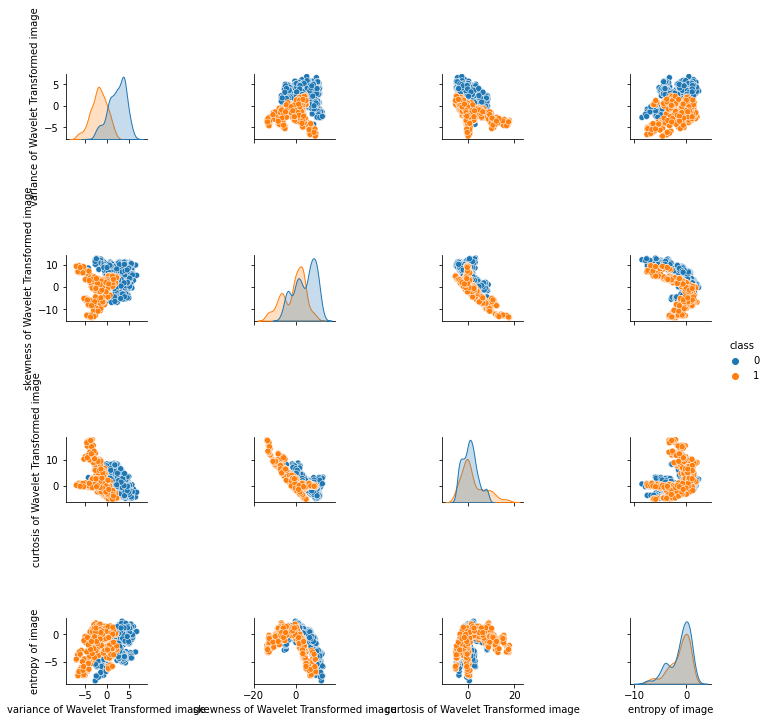

In [90]:
# data pre processing
df = pd.read_csv('banknote-data.csv')
df.head()
print('There are null values in the dataset:', df.isna().values.any())

sns.pairplot(df, hue='class', size=2.5)

X = df.drop(df.columns[[4]], axis=1)
Y = df.drop(df.columns[[0,1,2,3]], axis=1)


In [91]:
#@title Initialization
num_features = X.shape[1]
print('Number of Features', num_features)

w = np.zeros((1, num_features))  # weight vector
print(w)
b = 0                       # bias

Number of Features 4
[[0. 0. 0. 0.]]


In [92]:
def sigmoid(function):
  result = 1 / (1 + np.exp(-function))
  return result

def learning_model_sgd(w, b, X, Y, iterations, learning_rate, momentum=None, nag=False):

  costs = []

  for i in range(0, iterations):

    X, Y = sklearn.utils.shuffle(X, Y)  # A, X, Y all have the same length so they will be shuffled in the same order

    m = X.shape[0]  # number of samples

    # for momentum optimization
    v_w = 0.0
    v_b = 0.0

    for j in range(m):

      X_randomized = X.iloc[j]
      Y_randomized = Y.iloc[j]

      prediction = np.dot(X_randomized, w.T)
      prediction += b

      A = sigmoid(prediction) # predictions bound to the logestic curve [0, 1]

      m = X_randomized.shape[0]  # number of samples

      cost = -1/m * np.sum(Y_randomized * np.log(A) + (1-Y_randomized) * (np.log(1-A)))
      #costs.append(cost)

      if momentum != None and not nag:
        dw = np.dot((A-Y_randomized)[0], X_randomized) / m
        db = np.sum(A-Y_randomized) / m
        new_v_w = (momentum * v_w) + (learning_rate * dw)
        new_v_b = (momentum * v_b) + (learning_rate * db)
        w = w - new_v_w
        b = b - new_v_b
        v_w = new_v_w
        v_b = new_v_b
      if nag:
        w_lookahead = momentum * v_w
        b_lookahead = momentum * v_b
        w -= w_lookahead
        b -= b_lookahead
        dw = np.dot((A-Y_randomized)[0], X_randomized) / m
        db = np.sum(A-Y_randomized) / m
        new_v_w = (momentum * v_w) + (learning_rate * dw)
        new_v_b = (momentum * v_b) + (learning_rate * db)
        w = w - new_v_w
        b = b - new_v_b
        v_w = new_v_w
        v_b = new_v_b
      else:
        dw = np.dot((A-Y_randomized)[0], X_randomized) / m
        db = np.sum(A-Y_randomized) / m
        w = w - ( learning_rate * dw )
        b = b - ( learning_rate * db )

    costs.append(cost)

  return w, b, costs

def learning_model_bgd(w, b, X, Y, iterations, learning_rate):

  costs = []

  for i in range(0, iterations):
    prediction = np.dot(X, w.T)
    prediction += b
    A = sigmoid(prediction) # predictions bound to the logestic curve [0, 1]

    m = X.shape[0]  # number of samples

    cost = -1/m * np.sum(Y * np.log(A) + (1-Y) * (np.log(1-A)))
    #if (i % 100 == 0):
    costs.append(cost)

    # batch gradient descent calculation
    dw = np.dot((A-Y).T, X) / m
    db = np.sum(A-Y) / m

    # update parameters
    w = w - ( learning_rate * dw )
    b = b - ( learning_rate * db )

    #print(w, b)

  return w, b, costs

def learning_model_mbgd(w, b, X, Y, iterations, learning_rate, batch_size=32):

  costs = []

  for i in range(0, iterations):

    X, Y = sklearn.utils.shuffle(X, Y)  # A, X, Y all have the same length so they will be shuffled in the same order

    for j in range(0, X.shape[0], batch_size):
      # current mini-batch
      X_randomized = X[j:j + batch_size]
      Y_randomized = Y[j:j + batch_size]

      prediction = np.dot(X_randomized, w.T)
      prediction += b

      A = sigmoid(prediction) # predictions bound to the logestic curve [0, 1]

      m = X_randomized.shape[0]  # number of samples

      cost = -1/m * np.sum(Y_randomized * np.log(A) + (1-Y_randomized) * (np.log(1-A)))
      #costs.append(cost)

      # stochastic gradient descent
      dw = np.dot((A-Y_randomized).T, X_randomized) / m
      db = np.sum(A-Y_randomized) / m

      # update parameters
      w = w - ( learning_rate * dw )
      b = b - ( learning_rate * db )

    costs.append(cost)

  return w, b, costs

def prediction_model(w, b, X):
  prediction = np.dot(X, w.T) 
  prediction += b
  A = sigmoid(prediction) # prediction bound to the logestic curve

  m = X.shape[0]  # number of predictions/samples

  predictions = []
  for i in range(m):
    if A[i][0] > 0.5:
      predictions.append(1)
    else:
      predictions.append(0)

  return predictions




In [ ]:
iterations = 100
learning_rate = 0.001

w_bgd, b_bgd, costs_bgd = learning_model_bgd(w, b, X, Y, iterations, learning_rate)
w_mbgd, b_mbgd, costs_mbgd = learning_model_mbgd(w, b, X, Y, iterations, learning_rate, batch_size=64)
w_sgd, b_sgd, costs_sgd = learning_model_sgd(w, b, X, Y, iterations, learning_rate)
w_msgd, b_msgd, costs_msgd = learning_model_sgd(w, b, X, Y, iterations, learning_rate, momentum=0.9)
w_nsgd, b_nsgd, costs_nsgd = learning_model_sgd(w, b, X, Y, iterations, learning_rate, momentum=0.9, nag=True)

#print('Batch Gradient Descentw_bgd, b_bgd)

#predictions = prediction_model(w, b, X)
#print(predictions)

# graphing for cost reduction analysis
plt.plot(costs_bgd, label = "Bach Gradient Descent")
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title('BGD Cost Reduction Over Iterations')
plt.show()

plt.plot(costs_mbgd, label = "Mini-Batch Gradient Descent")
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title(' MBGD Cost Reduction Over Iterations')
plt.show()


plt.plot(costs_sgd, label = "Stochastic Gradient Descent")
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title(' SGD Cost Reduction Over Iterations')
plt.show()


plt.plot(costs_msgd, label = "Stochastic Gradient Descent With Momentum")
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title(' SGD w/ Momentum Cost Reduction Over Iterations')
plt.show()


plt.plot(costs_nsgd, label = "Stochastic Gradient Descent With NAG")
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title(' SGD w/ NAG Cost Reduction Over Iterations')
plt.show()

plt.plot(costs_bgd, label = "Bach Gradient Descent")
plt.plot(costs_mbgd, label = "Mini-Batch Gradient Descent")
plt.plot(costs_sgd, label = "Stochastic Gradient Descent")
plt.plot(costs_msgd, label = "Stochastic Gradient Descent With Momentum")
plt.plot(costs_nsgd, label = "Stochastic Gradient Descent With Momentum")
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title('Cost Reduction Over Iterations')
plt.legend()
plt.show()


# Batch Gradient Descent vs Stochastic Gradient Descent vs Mini-Batch Gradient Descent
As shown in the graphs above, mini-batch is the intermediary between stochastic and batch gradient descent. Batch computes the whole batch for one update, stochastic updates with every sample, and mini-batch takes subsets from the data set. While SGD will reduce the cost much faster (less learning) it has a high variability and does not clearly converge. Batch takes many iterations (a lot of learning) to finaly converge towards a value, while mini-batch does so faster than batch. With stochastic, we lose the ability to vectorize because there is an update at every step. Some more great information comparing the three can be found here: https://towardsdatascience.com/gradient-descent-811efcc9f1d5


# Optimized Gradient Descent
For the optimized gradient descent, I chose SGD with momentum and SGD with Nesterov accelerated gradient. SGD with momentum shown in the graph above shows less variability than compared with SGD and no momentum, but there is still some large variabilty at some points throughout the epochs. With NAG, it is shown to have even smaller oscillations than the vanilla SGD with momentum and that with no momentum.
